# Lineare Transformationen

## Auftrag
In dieser Aufgabe geht es darum, eine Funktion zu schreiben, die in der Ebene $\mathbb{R}^2$ die Gitterlinien des Koordinatensystems (Parallelen $x$- und $y$-Achse) und des Einheitskreises nach einer Abbldungsmatrix $A$ linear abbildet und mit der Bibliothek *matplotlib* zeichnet. Mit der Funktion sollen einige Anwendungsbeispiel gezeigt und erklärt werden. Die Funktion besitzt zusätzlich zwei optionale Parameter, mit welchen die Wertebreich für x- und y-Werte übersteuert werden können.

### Umgebung
Damit die Snippets funktionieren, müssen die folgendne Python-Module installiert sein.
* Matplotlib [1]
* NumPy [2]

In [19]:
# pip install matplotlib

In [20]:
# pip install numpy

## Theorie
Eine lineare Abbildung wird in der Mathematik eine Abbildung von ${\mathbb{R}^n}$ nach ${\mathbb{R}^m}$ bezeichnet, welche durch eine Matrix beschrieben wird. In einfachen Worten: "Die Koorinaten eines Punktes zu wechseln" oder "Die Abbildung bewegt Punkte".  
Eine lineare Abbildung wird nur als solche bezeichnet wenn folgende Eigenschaften gegeben sind [3]:
* Eine Gerade wird wieder auf eine Gerade abgebildet, wobei die Streckenverhälntisse auf der Geraden erhalten bleidben, oder auf einen einzelnen Punkt.
* Wenn zwei parallele Geraden auf zwei Geranden abgebildet werden, dann sind die Geraden parallel.
* Der Nullpunkt wird auf den Nullpunkt abgebildet.

Die lineare Abbildung $f$ kann hier also folgendermassen definiert werden:  

$$f: \begin{cases}
  \mathbb{R}^n \rightarrow \mathbb{R}^m \\
  x \mapsto A*x
 \end{cases}$$  

Die Matritzenmultiplikation $M*x$ gescheiht bei $M$ zeilenweise und bei $x$ spaltenweise. Der Eintrag der $i$-ten Zeile und der $k$-ten Spalte der Matrix $M*x$ kann so berechnet werden, wenn oben genannte Bedingungen zutreffen:  

$$\sum\limits_{j=1}^n  A_{i,j}*x_{j,k}$$  

Bei der linearen Abbildung werden die kanonischen Einheitsvektoren $e_1 = (1,  0)^T$ und $e_2 = (0, 1)^T$ durch die Matrizenmultiplikation so abgebildet, dass sie dann die Form $e_1 = (A_{1,1}, A_{2,1})^T$ und $e_2 = (A_{1,2}, A_{2,2})^T$ haben. Dementsprechend wurde das Koordinatensystem neu abgebildet und so auch alle im Koordinatensystem vorhandenen Punkte. Je nach Form der Abbildungsmatrix können Skalierungen, Scherungen, Drehungen, Sieglungen oder Projektionen geschehen. Alle gennanten Abbildungsmatrix werden mit dem folgenden Anwendungsbeispielen aufgezeigt.  
Nachfolgend werden kurz die genannten Abbildungsmatrixen beschrieben. An dieser Stelle wird kein Beweis für die Abbildungsmatrixen gennant [3].

**Skalierung**  
Bei der Skalierung werden bei der Einheitsmatrix die "Einsen" verändert. So kann die x-Achse oder y-Achse gestaucht oder getreckt werden.  

**Scherung**  
Bei der Scherung werden bei der Einheitsmatrix die "Nullen" verändert. Die Punkte werden somit parallel zur jeweiligen Achse verschoben. Die Verschiebungsrichtung ist Oberhalb der x-Achse und unterhalb der x-Achse immer umbekehrt.

**Drehung**  
Bei einer Drehung ändert sich die Fläche nicht, nur die Lage wird geändert. Eine Drehung erfolgt jeweils um den Nullpunkt mit anhand eines Winkel $\alpha$. Somit bleibt der Nullpunkt auf seinem Uhrsprungspunkt. Eine Drehung wird mittels folgender Abbildungsmatrix beschrieben:  

$$M = \begin{pmatrix}
cos(\alpha) & -sin(\alpha) \\
sin(\alpha) & cos(\alpha)
\end{pmatrix}$$

**Spiegelung**
Bei einer Spiegelung wird die Gerade gespiegelt, die druch den Nuzllpunkt geht und einen Winkel von $\alpha$ zur waagerechten Achse hat. Dies wird durch folgende Abbildungsmatrix beschreiben:

$$M = \begin{pmatrix}
cos(2\alpha) & sin(2\alpha) \\
sin(2\alpha) & -cos(2\alpha)
\end{pmatrix}$$  

**Projektion**
Bei einer Projektion werden alle Punkte auf eine Achse Projetziert.

## Anwendungsbeispiel
Die folgende Funktion `lineareAbbildung` führt eine Abbildungsmatrix $A$ auf einen Einheitskreis aus.

### Code

In [21]:
# Importe für Numpy und Matplotlib

import numpy as np
import matplotlib.pyplot as plt

In [22]:
def generiereEinheitskreisKoord():
    """
    Generiert die Koordinaten eines Einheitskreises welcher druch ein Vieleck simuliert wird.
    Radius des Einheitskreis beträgt 0.5 und sein Zentrum liegt auf dem Punkt (0.5,0.5).
    """
    x_koord = [(np.cos(np.deg2rad(grad))+1)/2 for grad in range(360)]
    y_koord = [(np.sin(np.deg2rad(grad))+1)/2 for grad in range(360)]
    return np.asanyarray([x_koord, y_koord])

In [23]:
def lineareAbbildung(A, x=2, y=2):
    """ 
    Ermittelt eine lineare Abbildung mit der Matrix M für einen Einheitskreis.
    @param: Matrix M: Abildungsmatrix für die lineare Abbildung
    @param: int x: Min- und Maximaler Wertebereich der x-Achse, Standartwert ist min. -3 und max. 3
    @param: int y: Min- und Maximaler Wertebereich der y-Achse, SStandartwert ist min. -3 und max. 3
    """
    
    xmax, xmin = x, -x
    ymax, ymin = y, -y

    zeilen = np.shape(A)[0]
    spalten = np.shape(A)[1]
 
    # Überprüfung der Form der Abbildungsmatrix
    if spalten > 2:
        # Erstellt ein Indexgrid für die 2x2-Matrix
        indexgrid = np.ix_([True, True], [0, 1])
        A = A[indexgrid]
        spalten = np.shape(A)[1]
        
    # Überprüfung der Form der Abbildungsmatrix
    if spalten == 2 and zeilen >= 2:
        # Plot vorbereiten
        fig, ax = plt.subplots()
        ax.set_aspect("equal")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xlim(xmin,xmax)
        plt.ylim(ymin,ymax)
        plt.xticks(np.arange(xmin, xmax + 1, 1.0))
        plt.yticks(np.arange(ymin, ymax + 1, 1.0))
        
        # Parallelen zur x- und y-Achse darstellen
        plt.grid(alpha = 0.5, color='grey')
        
        # Einheitskreiz darstellen
        einheitskreis_koord = generiereEinheitskreisKoord()
        plt.plot(einheitskreis_koord[0], einheitskreis_koord[1], color='blue')
        
        # lineare Abbildung des Einheitskreises berechnen und darstellen
        abbildung_einheitskreis_koord = np.array(np.mat(A) * np.mat(einheitskreis_koord))
        plt.plot(abbildung_einheitskreis_koord[0], abbildung_einheitskreis_koord[1], color='red')
        
        # Dahrstellung der abgebildenten x- und y-Achsen
        for i in range(-5 * np.abs(ymin), 5 * ymax + 1):
            alt = np.asanyarray([[-5 * np.abs(xmin), 5 * xmax], [i,i]])
            neu = np.array(np.mat(A) * np.mat(alt))
            plt.plot(neu[0], neu[1], color='green', alpha=0.3)
        
        for i in range(-5*np.abs(xmin), 5*xmax+1):
            alt = np.asanyarray([[i,i], [-5 * np.abs(ymin), 5 * ymax]])
            neu = np.array(np.mat(A)*np.mat(alt))
            plt.plot(neu[0], neu[1], color='green',alpha=0.3)
        
        plt.show()
    else:
        raise ValueError("Die Abbildungsmatrix muss mindestens eine 2x2 Matrix sein.")

### Erklärung der Funktion
Die Funktion `lineareAbbildung` erhält als Parameter eine Abbildungsmatrix $M$. Die optionalen Parameter für den Wertebereich des Plots haben default-Werte, so können diese beim Benutzen der Funktion angepasst oder weggelassen werden.

Die Anzahl Spalten der Abbildungsmatrix $M$ muss zwingend 2 sein, denn wir befinden uns im zweidimensionalen Raum. Wenn irgendein Punkt $P$ in ${\mathbb{R}^2}$ linear abgebildet werden soll, so muss eine Matrizenmultiplikation ${A*P}$ stattfinden. der Punkt $P$ muss die Grösse ${2\times1}$ besitzen. Deshalb muss die $M$ die Grösse ${n\times2}$ besitzen, wobei die Bedingung ${n>=2}$ und ${n \in \mathbb{N}}$ erfüllt sein muss. Bei den Fällen ${n>2}$ werden die Zeilen 3 bis n in der grafischen Darstellung keinen sichtbaren Einfluss haben, da bei den errechneten Matrizen nur die Indexe 0 und 1 für die Abbildung verwendet werden.

Da eine Abbildung eines Kreises nicht ganz einfach zu bestimmen ist, wird mit einem Vieleck gearbeitet. Dabei werden die Kooridnaten der Ecken mit $cos(\varphi)$ und $sin(\varphi)$ berechnet, wobei $\varphi$ einen Winkel zwischen $0$ und $2\pi$ bzw. $0-360$ Grad annimmt. Die Berechneten Koordinaten werden danach umgewandelt, dass es einen Einheitskreiss mit einem Radius von $0.5$ ergibt und sein Zentrum sich bei dem Punkt $P_K=(0.5, 0.5)$ befindet. Dies geschiet in der Hilfsfmethoe `generiereEinheitskreisKoord`.

Der Plot wird in fünf Schritten erzeugt. Zu beginn wird Standardmässig mit `plt.subplots()` ein Bereich für verschiedene Subplots erstellt. Der Plot wird mit *fig* und die Achsen mit *ax* referenziert. Mit `ax.set_aspect("equal")` wird festgelegt, dass alle Achsen dieselbe Skalierung haben. Dadurch wird sichergestellt, dass alle Einheitsvektoren gleich lang sind. Danach werden die Achsen beschriftet und der Anzeigebereich des Plots nach den Wertebereich-Parametern *x* und *y* gesetzt. Mit `plt.xticks(...)` und `plt.yticks(...)` wird noch die Beschriftung der Achse definiert. Mittels `ptl.grid(...)` werden das Koordinatenlinien im Plot dargestellt. Für die Dahrstellung des Einheitskreises werden zuert die benötigten Koordinaten über die Funktiion `generiereEinheitskreisKoord` geladen. Die Koordinaten werden als eine $2\times n$ Matrix definiert. In dieser Matrix zeigt jeweils die Spalte ein Punkt an. Alle Punkte in dieser Matrix werden mit `plt.plot(...)` gezeichnet und jeweils einen Punkt mit dem darauffolgenden verbunden.

Für die Berechnung der linearen Abbildung wird die Matrix des Einheitskreises mit der Abbildungsmatrix $M$ multipliziert. Die Matrixpultiplikation wird mittels `np.mat(...)` durchgefprt. Das Ergebnis der Matrizenmultiplikation wird wiederum in den gleichen Plot gezeichnet. 

Zum Schluss müssen noch die Achsenparallelen abgeblidet werden. Hierfür wird mit einer for-Schlaufe über einen Bereich der ganzzahligen Werte einer Achse iteriert. Als Bereich dieser Iteration wurde bewusst ${-2*|xmin|}$ bis ${2*xmax}$ gewählt, denn je nach Abbildung reicht der Bereich xmin bis xmax nicht aus. Die Variable *alt* definiert bei den X-Achsenparallelen eine Matrix der Form ${\begin{pmatrix}
    -2*|xmin|    & 2*xmax \\
    i       & i
\end{pmatrix}}$ Diese enthält somit Anfangs und Endpunkt der Parallele auf der Höhe ${y=i}$. Dies sind die Punkte, die zum Zeichnen einer Linie benötigt werden.  
Nun wird ${neu=A*\begin{pmatrix}
    -2*|xmin|    & 2*xmax \\
    i       & i
\end{pmatrix}}$ ausgerechnet und mit diesen Punkten wird die abgebildete Gerade in grün dargestellt.

Genau dasselbe wird dann für die Y-Achsenparallelen getan, indem über die möglichen x-Werte iteriert wird und entsprechende Anfangs- und Endpunkte der zu zeichnenden Achsenparallele errechnet werden.

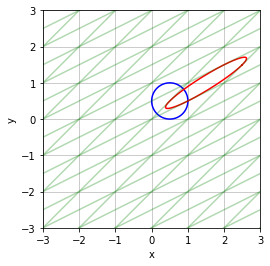

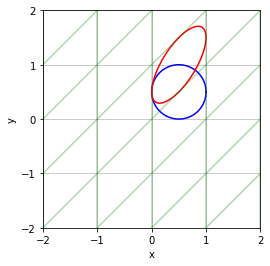

In [24]:

A = np.array([
    [2, 1],
    [1, 1]
])

lineareAbbildung(A, 3, 3)

A = np.array([
    [0, 1],
    [1, 1]
])

lineareAbbildung(A, 2, 2)

## Fazit


## Literaturverzeichnis
[1] Matplotlib. (2020). Matplotlib. Abgerufen am 07.05.2020 von https://matplotlib.org/  
[2] NumPy Developers. (2020). NumPy. Abgerufen am 07.05.2020 von https://numpy.org/  
[3] G. Teschl, S. Teschl. (2014) Mathematik für Informatiker. Springer-Verlag Berlin Heidelberg.  